    Homework 04: Naïve Bayes (NB)
    AMRUTHA KANAKATTE RAVISHANKAR
    CWID :20027346
This task is to perform a Naïve Bayes is a probabilistic classification algorithm based on Baye's theorem. Besides that, it assumes feature independence. It is generally used for text classification and works well with high-dimensional datasets because of its simplicity and efficiency.. 

In [23]:
#Importing all the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Load the dataset
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [25]:
# Handling the missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [26]:
# Convert Class to categorical
df['Class'] = df['Class'].astype('category')

In [27]:
# Features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

In [28]:
# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [29]:
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [30]:
# Prediction on test set
predictions = nb_model.predict(X_test)

In [31]:
# Evaluate the model performance using confusion matrix
confusion = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

In [32]:
# Classification Report
print("Confusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[133   0]
 [ 42  30]]

Classification Report:
               precision    recall  f1-score   support

           2       0.76      1.00      0.86       133
           4       1.00      0.42      0.59        72

    accuracy                           0.80       205
   macro avg       0.88      0.71      0.73       205
weighted avg       0.84      0.80      0.77       205



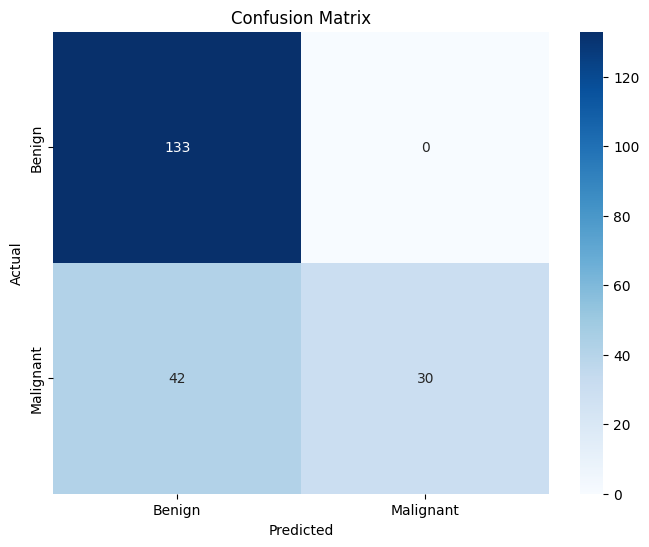

In [33]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()